In [1]:
import crater_math as cm
import references as ref
import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy as np
df = pd.read_csv("Datasets/meteorite_data.csv")


ice = df.copy()
ice['KE'] = cm.dataKinEnergy(ice['mass'], 20)
ice = cm.dataDiameter(1.3,1.0,1.0, ice,'KE', 'crater_diameter', ref.dicProjectileDensity["ice"], ref.dicTargetDensity["sedimentary"])
ice['crater_depth'] = cm.dataDepth14(ice['crater_diameter']).where(ice['crater_diameter'] <= 1400, cm.dataDepth(ice['crater_diameter']))
#ice.to_csv("Datasets/ice_data.csv", index = False)

porous = df.copy()
porous['KE'] = cm.dataKinEnergy(ice['mass'], 20)
porous = cm.dataDiameter(1.3,1.0,1.0, porous,'KE', 'crater_diameter', ref.dicProjectileDensity["porous"], ref.dicTargetDensity["sedimentary"])
porous['crater_depth'] = cm.dataDepth14(porous['crater_diameter']).where(porous['crater_diameter'] <= 1400, cm.dataDepth(porous['crater_diameter']))
#porous.to_csv("Datasets/porous_data.csv", index = False)

dense = df.copy()
dense['KE'] = cm.dataKinEnergy(dense['mass'], 20)
dense = cm.dataDiameter(1.3,1.0,1.0, dense,'KE', 'crater_diameter', ref.dicProjectileDensity["dense"], ref.dicTargetDensity["sedimentary"])
dense['crater_depth'] = cm.dataDepth14(dense['crater_diameter']).where(dense['crater_diameter'] <= 1400, cm.dataDepth(dense['crater_diameter']))
#dense.to_csv("Datasets/dense_data.csv", index = False)

iron = df.copy()
iron['KE'] = cm.dataKinEnergy(iron['mass'], 20)
iron = cm.dataDiameter(1.3,1.0,1.0, iron,'KE', 'crater_diameter', ref.dicProjectileDensity["iron"], ref.dicTargetDensity["sedimentary"])
iron['crater_depth'] = cm.dataDepth14(iron['crater_diameter']).where(iron['crater_diameter'] <= 1400, cm.dataDepth(iron['crater_diameter']))
#iron.to_csv("Datasets/iron_data.csv", index = False)

iron.tail(10)

ModuleNotFoundError: No module named 'matplotlib'

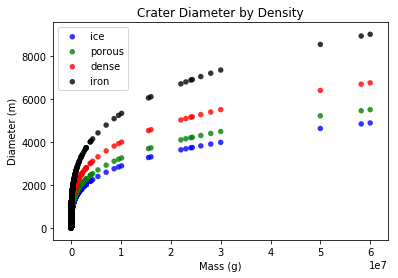

In [2]:
g1 = (ice['mass'], ice['crater_diameter'])
g2 = (porous['mass'], porous['crater_diameter'])
g3 = (dense['mass'], dense['crater_diameter'])
g4 = (iron['mass'], iron['crater_diameter'])
    
data = (g1, g2, g3, g4)
colors = ("blue", "green", "red", "black")
groups = ("ice", "porous", "dense", "iron")
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
 
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.title('Crater Diameter by Density')
plt.legend(loc=2)
plt.xlabel('Mass (g)')
plt.ylabel('Diameter (m)')
plt.savefig("DiameterChart.png")
plt.show()

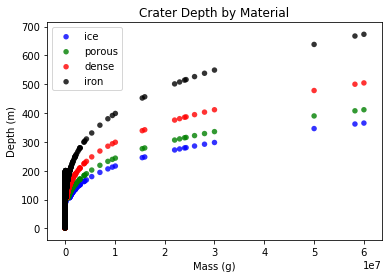

In [3]:
g1 = (ice['mass'], ice['crater_depth'])
g2 = (porous['mass'], porous['crater_depth'])
g3 = (dense['mass'], dense['crater_depth'])
g4 = (iron['mass'], iron['crater_depth'])
    
data = (g1, g2, g3, g4)
colors = ("blue", "green", "red", "black")
groups = ("ice", "porous", "dense", "iron")
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
 
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.title('Crater Depth by Material')
plt.legend(loc=2)
plt.xlabel('Mass (g)')
plt.ylabel('Depth (m)')
plt.savefig("DepthChart.png")
plt.show()